In [12]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
!pip install rdkit
!pip install biopython
!pip install posebusters

Number of subfolders to process: 308
Number of true binding poses in 7XRL_FWK: 2
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 7XRL_FWK (true pose 1): 1.737026194390862
7XRL_FWK passes RMSD CalcRMS < 2 Å for true pose 1.
7XRL_FWK has at least one pose passing all the tests.
Number of true binding poses in 7ZDY_6MJ: 2
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 7ZDY_6MJ (true pose 1): 2.5532593608241916
Checking predicted binding pose vs true binding pose number 2
RMSD CalcRMS for 7ZDY_6MJ (true pose 2): 48.22690159500759
7ZDY_6MJ does not have any pose passing all the tests.
Number of true binding poses in 7WCF_ACP: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 7WCF_ACP (true pose 1): 1.1170320265717975
7WCF_ACP passes RMSD CalcRMS < 2 Å for true pose 1.
7WCF_ACP has at least one pose passing all the tests.
Number of true binding poses in 8AUH_L9I: 2
Checking predicted binding pose vs

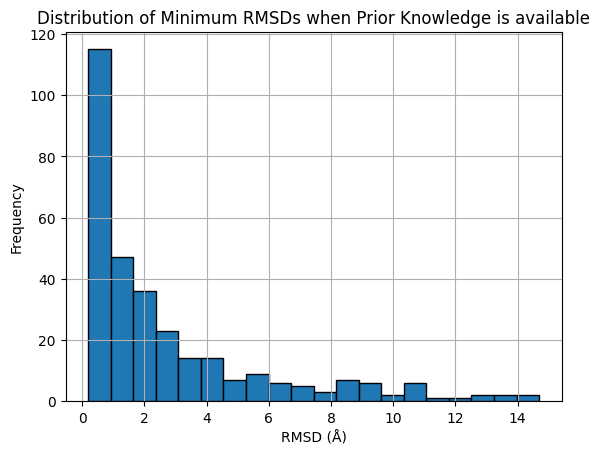

In [3]:
#@title **RMSD distribution for PoseBusters when Prior Knowledge about pocket is available**


import os
import numpy as np
import csv
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError("No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set_CROSSCHECK'
subfolders_file = '/content/gdrive/MyDrive/Another_Attempt_Docking/posebusters_pdb_ccd_ids.txt'
output_file_path = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/Prior_Knowledge_output.txt'
csv_output_path = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/Prior_knowledge_results.csv'

rmsd_prior_knowledge = []

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

with open(output_file_path, 'w') as output_file, open(csv_output_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Protein", "Min RMSD"])

    for subfolder in os.listdir(main_dir):
        if subfolder in subfolders_to_process:
            subfolder_path = os.path.join(main_dir, subfolder)
            if os.path.isdir(subfolder_path):
                predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")
                true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

                true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
                true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
                num_true_poses = len(true_ligands)
                print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

                pose_passed = False
                min_rmsd = float('inf')
                rmsd_values = []

                for i, true_ligand in enumerate(true_ligands):
                    print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                    try:
                        rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                        rmsd_values.append(rmsd_value)
                        print(f"RMSD CalcRMS for {subfolder} (true pose {i+1}): {rmsd_value}")

                        if rmsd_value < min_rmsd:
                            min_rmsd = rmsd_value

                        if is_pose_correct(rmsd_value):
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD CalcRMS < 2 Å for true pose {i+1}.")
                            break
                    except (ValueError, RuntimeError) as e:
                        print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

                rmsd_prior_knowledge.append(min_rmsd)
                output_file.write(f"{subfolder} minimum RMSD: {min_rmsd:.3f} Å\n")
                csv_writer.writerow([subfolder, min_rmsd])

                if pose_passed:
                    print(f"{subfolder} has at least one pose passing all the tests.")
                else:
                    print(f"{subfolder} does not have any pose passing all the tests.")

    print(f"Number of subfolders where poses have RMSD < 2 Å: {correct_pose_count}")
    output_file.write(f"Number of subfolders where poses have RMSD < 2 Å: {correct_pose_count}\n")
    output_file.write(f"List of minimum RMSDs: {rmsd_prior_knowledge}\n")

print(f"Output saved to {output_file_path}")

plt.hist(rmsd_prior_knowledge, bins=20, edgecolor='black')
plt.title('Distribution of Minimum RMSDs when Prior Knowledge is available')
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/Prior_Knowledge_rmsd_distribution.png')
plt.show()


Number of subfolders to process: 263
Number of true binding poses in 6ZK5_IMH: 2
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 6ZK5_IMH (true pose 1): 2.863756926982824
Checking predicted binding pose vs true binding pose number 2
RMSD CalcRMS for 6ZK5_IMH (true pose 2): 36.88496191646329
6ZK5_IMH does not have any pose passing all the tests.
Number of true binding poses in 7BTT_F8R: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 7BTT_F8R (true pose 1): 6.706866481450187
7BTT_F8R does not have any pose passing all the tests.
Number of true binding poses in 7CL8_TES: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 7CL8_TES (true pose 1): 0.32481342630002535
7CL8_TES passes RMSD CalcRMS < 2 Å for true pose 1.
7CL8_TES has at least one pose passing all the tests.
Number of true binding poses in 7ELT_TYM: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 7ELT_T

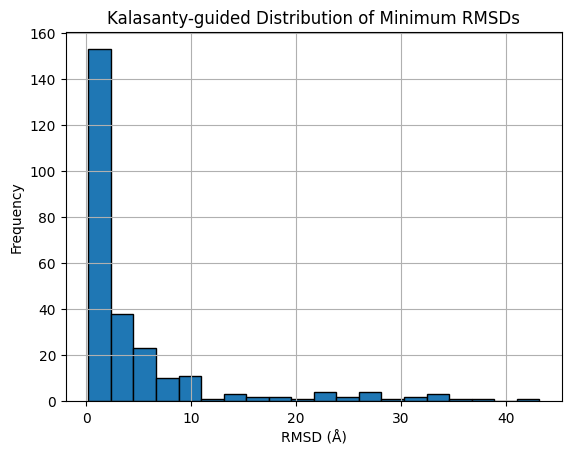

In [4]:
#@title **RMSD distribution for PoseBusters when guided by Kalasanty**

import os
import numpy as np
import csv
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError("No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/Kalasanty_comparison/posebusters_benchmark_set'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/Kalasanty_list_of_POCKETS_PRESENT.txt'
output_file_path = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/Kalasanty_PoseBusters_rmsd_output.txt'
csv_output_path = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/Kalasanty_rmsd_results.csv'

rmsd_Kalasanty = []

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

with open(output_file_path, 'w') as output_file, open(csv_output_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Protein", "Min RMSD"])

    for subfolder in os.listdir(main_dir):
        if subfolder in subfolders_to_process:
            subfolder_path = os.path.join(main_dir, subfolder)
            if os.path.isdir(subfolder_path):
                predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")
                true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

                true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
                true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
                num_true_poses = len(true_ligands)
                print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

                pose_passed = False
                min_rmsd = float('inf')
                rmsd_values = []

                for i, true_ligand in enumerate(true_ligands):
                    print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                    try:
                        rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                        rmsd_values.append(rmsd_value)
                        print(f"RMSD CalcRMS for {subfolder} (true pose {i+1}): {rmsd_value}")

                        if rmsd_value < min_rmsd:
                            min_rmsd = rmsd_value

                        if is_pose_correct(rmsd_value):
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD CalcRMS < 2 Å for true pose {i+1}.")
                            break
                    except (ValueError, RuntimeError) as e:
                        print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

                rmsd_Kalasanty.append(min_rmsd)
                output_file.write(f"{subfolder} minimum RMSD: {min_rmsd:.3f} Å\n")
                csv_writer.writerow([subfolder, min_rmsd])

                if pose_passed:
                    print(f"{subfolder} has at least one pose passing all the tests.")
                else:
                    print(f"{subfolder} does not have any pose passing all the tests.")

    print(f"Number of subfolders where poses have RMSD < 2 Å: {correct_pose_count}")
    output_file.write(f"Number of subfolders where poses have RMSD < 2 Å: {correct_pose_count}\n")
    output_file.write(f"List of minimum RMSDs: {rmsd_Kalasanty}\n")

print(f"Output saved to {output_file_path}")
print(f"CSV saved to {csv_output_path}")

plt.hist(rmsd_Kalasanty, bins=20, edgecolor='black')
plt.title('Kalasanty-guided Distribution of Minimum RMSDs')
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/Kalasanty_PoseBusters_rmsd_distribution.png')
plt.show()


Number of subfolders to process: 278
Number of true binding poses in 6ZK5_IMH: 2
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 6ZK5_IMH (true pose 1): 2.8657925972628093
Checking predicted binding pose vs true binding pose number 2
RMSD CalcRMS for 6ZK5_IMH (true pose 2): 36.88217895150076
6ZK5_IMH does not have any pose passing all the tests.
Number of true binding poses in 7BTT_F8R: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 7BTT_F8R (true pose 1): 7.631495241759639
7BTT_F8R does not have any pose passing all the tests.
Number of true binding poses in 7CL8_TES: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 7CL8_TES (true pose 1): 0.3188416534896276
7CL8_TES passes RMSD CalcRMS < 2 Å for true pose 1.
7CL8_TES has at least one pose passing all the tests.
Number of true binding poses in 7ELT_TYM: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 7ELT_T

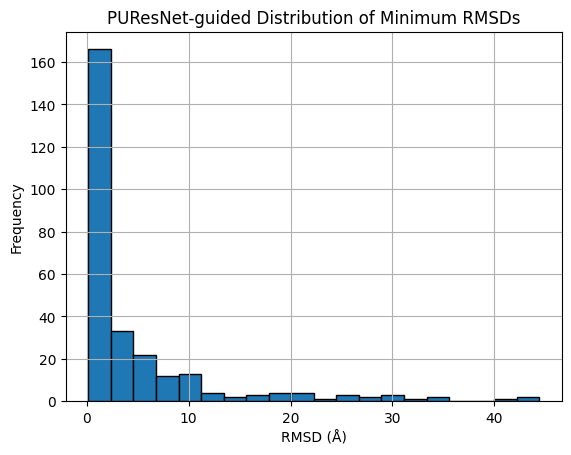

In [5]:
#@title **RMSD distribution for PoseBusters when guided by PUResNet V1**

import os
import numpy as np
import csv
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError(f"No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/PUResNet_comparison/posebusters_benchmark_set'

subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/PUResNet_list_of_POCKETS_PRESENT.txt'

output_file_path = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/PUResNet_PoseBusters_rmsd_output.txt'
csv_output_path = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/PUResNet_rmsd_results.csv'

rmsd_PUResNet = []

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

with open(output_file_path, 'w') as output_file, open(csv_output_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Protein", "Min RMSD"])

    for subfolder in os.listdir(main_dir):
        if subfolder in subfolders_to_process:
            subfolder_path = os.path.join(main_dir, subfolder)
            if os.path.isdir(subfolder_path):
                predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")
                true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

                true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
                true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
                num_true_poses = len(true_ligands)
                print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

                pose_passed = False
                min_rmsd = float('inf')
                rmsd_values = []

                for i, true_ligand in enumerate(true_ligands):
                    print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                    try:
                        rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                        rmsd_values.append(rmsd_value)
                        print(f"RMSD CalcRMS for {subfolder} (true pose {i+1}): {rmsd_value}")

                        if rmsd_value < min_rmsd:
                            min_rmsd = rmsd_value

                        if is_pose_correct(rmsd_value):
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD CalcRMS < 2 Å for true pose {i+1}.")
                            break
                    except (ValueError, RuntimeError) as e:
                        print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

                rmsd_PUResNet.append(min_rmsd)
                output_file.write(f"{subfolder} minimum RMSD: {min_rmsd:.3f} Å\n")
                csv_writer.writerow([subfolder, min_rmsd])

                if pose_passed:
                    print(f"{subfolder} has at least one pose passing all the tests.")
                else:
                    print(f"{subfolder} does not have any pose passing all the tests.")

    print(f"Number of subfolders where poses have RMSD < 2 Å: {correct_pose_count}")
    output_file.write(f"Number of subfolders where poses have RMSD < 2 Å: {correct_pose_count}\n")
    output_file.write(f"List of minimum RMSDs: {rmsd_PUResNet}\n")

print(f"Output saved to {output_file_path}")
print(f"CSV saved to {csv_output_path}")

plt.hist(rmsd_PUResNet, bins=20, edgecolor='black')
plt.title('PUResNet-guided Distribution of Minimum RMSDs')
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/PUResNet_PoseBusters_rmsd_distribution.png')
plt.show()


Number of subfolders to process: 308
Number of true binding poses in 5SAK_ZRY: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 5SAK_ZRY (true pose 1): 0.24474113308192047
5SAK_ZRY passes RMSD CalcRMS < 2 Å for true pose 1.
5SAK_ZRY has at least one pose passing all the tests.
Number of true binding poses in 5SB2_1K2: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 5SB2_1K2 (true pose 1): 0.4259488232170622
5SB2_1K2 passes RMSD CalcRMS < 2 Å for true pose 1.
5SB2_1K2 has at least one pose passing all the tests.
Number of true binding poses in 5SD5_HWI: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 5SD5_HWI (true pose 1): 4.537986584530557
5SD5_HWI does not have any pose passing all the tests.
Number of true binding poses in 5SIS_JSM: 1
Checking predicted binding pose vs true binding pose number 1
RMSD CalcRMS for 5SIS_JSM (true pose 1): 9.048054400670898
5SIS_JSM does not have any pose p

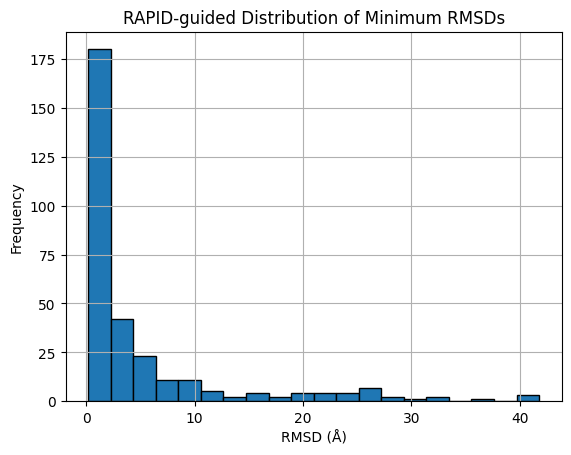

In [6]:
#@title **RMSD distribution for PoseBusters when guided by RAPID-Net**

import os
import numpy as np
import csv
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError("No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_Ensemble_Run_copy_copy'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_pdb_ccd_ids.txt'
output_file_path = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/RAPID_PoseBusters_rmsd_output.txt'
csv_output_path = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/RAPID_rmsd_results.csv'

rmsd_RAPID = []

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

with open(output_file_path, 'w') as output_file, open(csv_output_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Protein", "Min RMSD"])

    for subfolder in os.listdir(main_dir):
        if subfolder in subfolders_to_process:
            subfolder_path = os.path.join(main_dir, subfolder)
            if os.path.isdir(subfolder_path):
                predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")
                true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

                true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
                true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
                num_true_poses = len(true_ligands)
                print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

                pose_passed = False
                min_rmsd = float('inf')
                rmsd_values = []

                for i, true_ligand in enumerate(true_ligands):
                    print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                    try:
                        rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                        rmsd_values.append(rmsd_value)
                        print(f"RMSD CalcRMS for {subfolder} (true pose {i+1}): {rmsd_value}")

                        if rmsd_value < min_rmsd:
                            min_rmsd = rmsd_value

                        if is_pose_correct(rmsd_value):
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD CalcRMS < 2 Å for true pose {i+1}.")
                            break
                    except (ValueError, RuntimeError) as e:
                        print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

                rmsd_RAPID.append(min_rmsd)
                output_file.write(f"{subfolder} minimum RMSD: {min_rmsd:.3f} Å\n")
                csv_writer.writerow([subfolder, min_rmsd])

                if pose_passed:
                    print(f"{subfolder} has at least one pose passing all the tests.")
                else:
                    print(f"{subfolder} does not have any pose passing all the tests.")

    print(f"Number of subfolders where poses have RMSD < 2 Å: {correct_pose_count}")
    output_file.write(f"Number of subfolders where poses have RMSD < 2 Å: {correct_pose_count}\n")
    output_file.write(f"List of minimum RMSDs: {rmsd_RAPID}\n")

print(f"Output saved to {output_file_path}")
print(f"CSV saved to {csv_output_path}")

plt.hist(rmsd_RAPID, bins=20, edgecolor='black')
plt.title('RAPID-guided Distribution of Minimum RMSDs')
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/RAPID_Net_PoseBusters_rmsd_distribution.png')
plt.show()


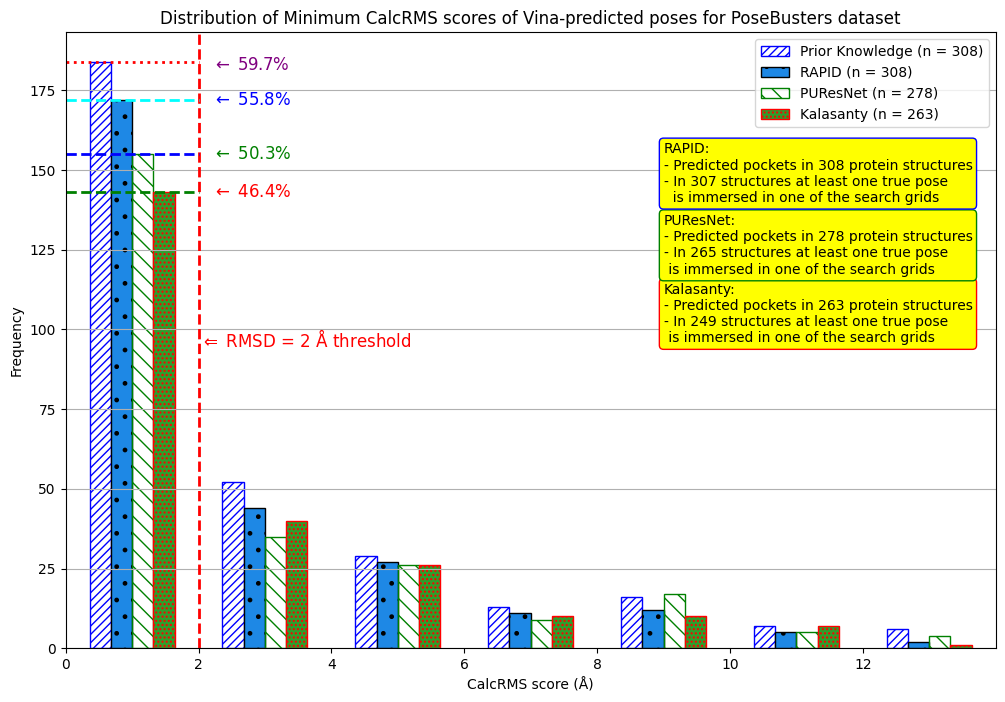

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n_prior_knowledge = 308
n_Kalasanty = 263
n_PUResNet = 278
n_RAPID = 308

bins = 20
hist_prior_knowledge, bin_edges = np.histogram(rmsd_prior_knowledge, bins=bins, range=(0, 40))
hist_Kalasanty, _ = np.histogram(rmsd_Kalasanty, bins=bins, range=(0, 40))
hist_PUResNet, _ = np.histogram(rmsd_PUResNet, bins=bins, range=(0, 40))
hist_RAPID, _ = np.histogram(rmsd_RAPID, bins=bins, range=(0, 40))

# Bin centers for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = 0.32  # Width of each bar

plt.figure(figsize=(12, 8))
plt.bar(bin_centers - 1.5 * width, hist_prior_knowledge, width=width, edgecolor='blue', fill=False, hatch='////', label=f'Prior Knowledge (n = 308)')
plt.bar(bin_centers - 0.5 * width, hist_RAPID, width=width, color='#1E88E5', hatch='.', edgecolor='black', label=f'RAPID (n = 308)')
plt.bar(bin_centers + 0.5 * width, hist_PUResNet, width=width, edgecolor='green', fill=False, hatch='\\\\', label=f'PUResNet (n = 278)')
plt.bar(bin_centers + 1.5 * width, hist_Kalasanty, width=width, edgecolor='red', hatch='....', label=f'Kalasanty (n = 263)')

plt.axvline(x=2, color='red', linestyle='--', linewidth=2)
plt.text(1.95, plt.ylim()[1]*0.5, ' $\Leftarrow$ RMSD = 2 Å threshold', color='red', verticalalignment='center', fontsize=12)

plt.plot([0, 2], [184, 184], color='red', linestyle='dotted', linewidth=2)
plt.plot([0, 2], [143, 143], color='green', linestyle='--', linewidth=2)
plt.plot([0, 2], [155, 155], color='blue', linestyle='--', linewidth=2)
plt.plot([0, 2], [172, 172], color='cyan', linestyle='--', linewidth=2)

plt.text(2.2, 183, '$\leftarrow$ 59.7%', color='purple', verticalalignment='center', fontsize=12)
plt.text(2.2, 143, '$\leftarrow$ 46.4%', color='red', verticalalignment='center', fontsize=12)
plt.text(2.2, 155, '$\leftarrow$ 50.3%', color='green', verticalalignment='center', fontsize=12)
plt.text(2.2, 172, '$\leftarrow$ 55.8%', color='blue', verticalalignment='center', fontsize=12)


plt.text(9, 96, 'Kalasanty:\n- Predicted pockets in 263 protein structures\n- In 249 structures at least one true pose \n is immersed in one of the search grids',
         fontsize=10, bbox=dict(boxstyle="round", facecolor='yellow', edgecolor='red'))

plt.text(9, 117.5, 'PUResNet:\n- Predicted pockets in 278 protein structures\n- In 265 structures at least one true pose \n is immersed in one of the search grids',
         fontsize=10, bbox=dict(boxstyle="round", facecolor='yellow', edgecolor='green'))

plt.text(9, 140, 'RAPID:\n- Predicted pockets in 308 protein structures\n- In 307 structures at least one true pose \n  is immersed in one of the search grids',
         fontsize=10, bbox=dict(boxstyle="round", facecolor='yellow', edgecolor='blue'))



plt.title('Distribution of Minimum CalcRMS scores of Vina-predicted poses for PoseBusters dataset')
plt.xlabel('CalcRMS score (Å)')
plt.ylabel('Frequency')
plt.xlim(0, 14)
plt.xticks(ticks=np.arange(0, 14, 2))
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.savefig('/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/rmsd_distribution_side_by_side_histogram_styled.png')
plt.show()

In [9]:
#@title **Chemical validity tests, PoseBusters when prior knowledge is available**

import os
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import re

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError(f"No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_pdb_ccd_ids.txt'

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

for subfolder in os.listdir(main_dir):
    if subfolder in subfolders_to_process:
        subfolder_path = os.path.join(main_dir, subfolder)
        if os.path.isdir(subfolder_path):
            predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")

            protein_path = os.path.join(subfolder_path, f"{subfolder}_protein_reduce_rm_bad.pdb")
            true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

            true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
            true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
            num_true_poses = len(true_ligands)
            print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

            pose_passed = False

            for i, true_ligand in enumerate(true_ligands):
                print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                try:
                    rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                    print(f"RMSD for {subfolder} (true pose {i+1}): {rmsd_value}")

                    if not is_pose_correct(rmsd_value):
                        continue

                    command = [
                        'bust',
                        predicted_ligand_path,
                        '-l', true_ligands_path,
                        '-p', protein_path
                    ]

                    result = subprocess.run(command, capture_output=True, text=True, check=True)
                    output = result.stdout
                    print(output)

                    match = re.search(r'passes \((\d+) / (\d+)\)', output)
                    if match:
                        passed_tests = int(match.group(1))
                        total_tests = int(match.group(2))

                        print(f"PoseBusters test result for {subfolder} (true pose {i+1}): {passed_tests} / {total_tests}")

                        if passed_tests == total_tests:
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD < 2 Å and all PoseBusters tests for true pose {i+1}.")
                            break
                    else:
                        print(f"PoseBusters test did not pass for {subfolder} (true pose {i+1}).")
                except (ValueError, RuntimeError, subprocess.CalledProcessError) as e:
                    print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

print(f"Number of subfolders where poses have RMSD < 2 Å and pass the PB test: {correct_pose_count}")

Number of subfolders to process: 308
Number of true binding poses in 7ZDY_6MJ: 2
Checking predicted binding pose vs true binding pose number 1
RMSD for 7ZDY_6MJ (true pose 1): 2.5532593608241916
Checking predicted binding pose vs true binding pose number 2
RMSD for 7ZDY_6MJ (true pose 2): 48.22690159500759
Number of true binding poses in 7WCF_ACP: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 7WCF_ACP (true pose 1): 1.1170320265717975
/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/7WCF_ACP/7WCF_ACP_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 7WCF_ACP (true pose 1): 26 / 26
7WCF_ACP passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of true binding poses in 8F8E_XJI: 2
Checking predicted binding pose vs true binding pose number 1
RMSD for 8F8E_XJI (true pose 1): 1.099972131308413
/content/gdrive/MyDrive/Docking_benchmarks/posebusters_benchmark_set/8F8E_XJI/8F8E_XJI_predicted_pose.sdf mol

In [10]:
#@title **Chemical validity tests, PoseBusters when guided by RAPID-Net Ensemble of 5 models**

import os
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import re

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError(f"No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_Ensemble_Run_copy_copy'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/posebusters_pdb_ccd_ids.txt'

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0
passed_subfolders = []

for subfolder in os.listdir(main_dir):
    if subfolder in subfolders_to_process:
        subfolder_path = os.path.join(main_dir, subfolder)
        if os.path.isdir(subfolder_path):
            predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")
            protein_path = os.path.join(subfolder_path, f"{subfolder}_protein_reduce_rm_bad.pdb")
            true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

            true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
            true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
            num_true_poses = len(true_ligands)
            print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

            pose_passed = False

            for i, true_ligand in enumerate(true_ligands):
                print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                try:
                    rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                    print(f"RMSD for {subfolder} (true pose {i+1}): {rmsd_value}")

                    if not is_pose_correct(rmsd_value):
                        continue

                    command = [
                        'bust',
                        predicted_ligand_path,
                        '-l', true_ligands_path,
                        '-p', protein_path
                    ]

                    result = subprocess.run(command, capture_output=True, text=True, check=True)
                    output = result.stdout
                    print(output)

                    match = re.search(r'passes \((\d+) / (\d+)\)', output)
                    if match:
                        passed_tests = int(match.group(1))
                        total_tests = int(match.group(2))

                        print(f"PoseBusters test result for {subfolder} (true pose {i+1}): {passed_tests} / {total_tests}")

                        if passed_tests == total_tests:
                            correct_pose_count += 1
                            passed_subfolders.append(subfolder)
                            pose_passed = True
                            print(f"{subfolder} passes RMSD < 2 Å and all PoseBusters tests for true pose {i+1}.")
                            break
                    else:
                        print(f"PoseBusters test did not pass for {subfolder} (true pose {i+1}).")
                except (ValueError, RuntimeError, subprocess.CalledProcessError) as e:
                    print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

output_file = '/content/gdrive/MyDrive/Docking_benchmarks/Ensemble_RAPID_passed_subfolders.txt'
with open(output_file, 'w') as f:
    for subfolder in passed_subfolders:
        f.write(subfolder + '\n')

print(f"Number of subfolders where poses have RMSD < 2 Å and pass the PB test: {correct_pose_count}")
print(f"Passed subfolders saved to {output_file}")


Number of subfolders to process: 308
Number of true binding poses in 5SAK_ZRY: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SAK_ZRY (true pose 1): 0.24474113308192047
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_Ensemble_Run_copy_copy/5SAK_ZRY/5SAK_ZRY_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SAK_ZRY (true pose 1): 26 / 26
5SAK_ZRY passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of true binding poses in 5SB2_1K2: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SB2_1K2 (true pose 1): 0.4259488232170622
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_Ensemble_Run_copy_copy/5SB2_1K2/5SB2_1K2_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SB2_1K2 (true pose 1): 26 / 26
5SB2_1K2 passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Nu

In [11]:
#@title **Chemical validity tests, PoseBusters when guided by RAPID-Net, Run 1**

import os
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import re

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError(f"No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET32_folder_copy'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/SET32_list.txt'

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

for subfolder in os.listdir(main_dir):
    if subfolder in subfolders_to_process:
        subfolder_path = os.path.join(main_dir, subfolder)
        if os.path.isdir(subfolder_path):
            predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")
            protein_path = os.path.join(subfolder_path, f"{subfolder}_protein_reduce_rm_bad.pdb")
            true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

            true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
            true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
            num_true_poses = len(true_ligands)
            print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

            pose_passed = False

            for i, true_ligand in enumerate(true_ligands):
                print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                try:
                    rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                    print(f"RMSD for {subfolder} (true pose {i+1}): {rmsd_value}")

                    if not is_pose_correct(rmsd_value):
                        continue

                    command = [
                        'bust',
                        predicted_ligand_path,
                        '-l', true_ligands_path,
                        '-p', protein_path
                    ]

                    result = subprocess.run(command, capture_output=True, text=True, check=True)
                    output = result.stdout
                    print(output)

                    match = re.search(r'passes \((\d+) / (\d+)\)', output)
                    if match:
                        passed_tests = int(match.group(1))
                        total_tests = int(match.group(2))

                        print(f"PoseBusters test result for {subfolder} (true pose {i+1}): {passed_tests} / {total_tests}")

                        if passed_tests == total_tests:
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD < 2 Å and all PoseBusters tests for true pose {i+1}.")
                            break
                    else:
                        print(f"PoseBusters test did not pass for {subfolder} (true pose {i+1}).")
                except (ValueError, RuntimeError, subprocess.CalledProcessError) as e:
                    print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

print(f"Number of subfolders where poses have RMSD < 2 Å and pass the PB test: {correct_pose_count}")

Number of subfolders to process: 307
Number of true binding poses in 5SAK_ZRY: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SAK_ZRY (true pose 1): 0.25249400432925573
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET32_folder_copy/5SAK_ZRY/5SAK_ZRY_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SAK_ZRY (true pose 1): 26 / 26
5SAK_ZRY passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of true binding poses in 5SB2_1K2: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SB2_1K2 (true pose 1): 0.5130191029581646
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET32_folder_copy/5SB2_1K2/5SB2_1K2_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SB2_1K2 (true pose 1): 26 / 26
5SB2_1K2 passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of tr

In [14]:
#@title **Chemical validity tests, PoseBusters when guided by RAPID-Net, Run 2**

import os
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import re

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError(f"No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET33_folder_copy'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/SET33_list.txt'

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

for subfolder in os.listdir(main_dir):
    if subfolder in subfolders_to_process:
        subfolder_path = os.path.join(main_dir, subfolder)
        if os.path.isdir(subfolder_path):
            predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")
            protein_path = os.path.join(subfolder_path, f"{subfolder}_protein_reduce_rm_bad.pdb")
            true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

            true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
            true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
            num_true_poses = len(true_ligands)
            print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

            pose_passed = False

            for i, true_ligand in enumerate(true_ligands):
                print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                try:
                    rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                    print(f"RMSD for {subfolder} (true pose {i+1}): {rmsd_value}")

                    if not is_pose_correct(rmsd_value):
                        continue

                    command = [
                        'bust',
                        predicted_ligand_path,
                        '-l', true_ligands_path,
                        '-p', protein_path
                    ]

                    result = subprocess.run(command, capture_output=True, text=True, check=True)
                    output = result.stdout
                    print(output)

                    match = re.search(r'passes \((\d+) / (\d+)\)', output)
                    if match:
                        passed_tests = int(match.group(1))
                        total_tests = int(match.group(2))

                        print(f"PoseBusters test result for {subfolder} (true pose {i+1}): {passed_tests} / {total_tests}")

                        if passed_tests == total_tests:
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD < 2 Å and all PoseBusters tests for true pose {i+1}.")
                            break
                    else:
                        print(f"PoseBusters test did not pass for {subfolder} (true pose {i+1}).")
                except (ValueError, RuntimeError, subprocess.CalledProcessError) as e:
                    print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

print(f"Number of subfolders where poses have RMSD < 2 Å and pass the PB test: {correct_pose_count}")

Number of subfolders to process: 305
Number of true binding poses in 5SAK_ZRY: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SAK_ZRY (true pose 1): 0.2550813595698436
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET33_folder_copy/5SAK_ZRY/5SAK_ZRY_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SAK_ZRY (true pose 1): 26 / 26
5SAK_ZRY passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of true binding poses in 5SB2_1K2: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SB2_1K2 (true pose 1): 0.4778082251280316
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET33_folder_copy/5SB2_1K2/5SB2_1K2_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SB2_1K2 (true pose 1): 26 / 26
5SB2_1K2 passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of tru

In [15]:
#@title **Chemical validity tests, PoseBusters when guided by RAPID-Net, Run 3**

import os
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import re

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError(f"No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET35_folder_copy'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/SET35_list.txt'

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

for subfolder in os.listdir(main_dir):
    if subfolder in subfolders_to_process:
        subfolder_path = os.path.join(main_dir, subfolder)
        if os.path.isdir(subfolder_path):
            predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")
            protein_path = os.path.join(subfolder_path, f"{subfolder}_protein_reduce_rm_bad.pdb")
            true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

            true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
            true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
            num_true_poses = len(true_ligands)
            print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

            pose_passed = False

            for i, true_ligand in enumerate(true_ligands):
                print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                try:
                    rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                    print(f"RMSD for {subfolder} (true pose {i+1}): {rmsd_value}")

                    if not is_pose_correct(rmsd_value):
                        continue

                    command = [
                        'bust',
                        predicted_ligand_path,
                        '-l', true_ligands_path,
                        '-p', protein_path
                    ]

                    result = subprocess.run(command, capture_output=True, text=True, check=True)
                    output = result.stdout
                    print(output)

                    match = re.search(r'passes \((\d+) / (\d+)\)', output)
                    if match:
                        passed_tests = int(match.group(1))
                        total_tests = int(match.group(2))

                        print(f"PoseBusters test result for {subfolder} (true pose {i+1}): {passed_tests} / {total_tests}")

                        if passed_tests == total_tests:
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD < 2 Å and all PoseBusters tests for true pose {i+1}.")
                            break
                    else:
                        print(f"PoseBusters test did not pass for {subfolder} (true pose {i+1}).")
                except (ValueError, RuntimeError, subprocess.CalledProcessError) as e:
                    print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

print(f"Number of subfolders where poses have RMSD < 2 Å and pass the PB test: {correct_pose_count}")

Number of subfolders to process: 308
Number of true binding poses in 5SAK_ZRY: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SAK_ZRY (true pose 1): 0.2418019161765816
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET35_folder_copy/5SAK_ZRY/5SAK_ZRY_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SAK_ZRY (true pose 1): 26 / 26
5SAK_ZRY passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of true binding poses in 5SB2_1K2: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SB2_1K2 (true pose 1): 0.47842585632467655
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET35_folder_copy/5SB2_1K2/5SB2_1K2_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SB2_1K2 (true pose 1): 26 / 26
5SB2_1K2 passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of tr

In [16]:
#@title **Chemical validity tests, PoseBusters when guided by RAPID-Net, Run 4**

import os
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import re

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError(f"No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET36_folder_copy'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/SET36_list.txt'

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

for subfolder in os.listdir(main_dir):
    if subfolder in subfolders_to_process:
        subfolder_path = os.path.join(main_dir, subfolder)
        if os.path.isdir(subfolder_path):
            predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")
            protein_path = os.path.join(subfolder_path, f"{subfolder}_protein_reduce_rm_bad.pdb")
            true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

            true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
            true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
            num_true_poses = len(true_ligands)
            print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

            pose_passed = False

            for i, true_ligand in enumerate(true_ligands):
                print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                try:
                    rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                    print(f"RMSD for {subfolder} (true pose {i+1}): {rmsd_value}")

                    if not is_pose_correct(rmsd_value):
                        continue

                    command = [
                        'bust',
                        predicted_ligand_path,
                        '-l', true_ligands_path,
                        '-p', protein_path
                    ]

                    result = subprocess.run(command, capture_output=True, text=True, check=True)
                    output = result.stdout
                    print(output)

                    match = re.search(r'passes \((\d+) / (\d+)\)', output)
                    if match:
                        passed_tests = int(match.group(1))
                        total_tests = int(match.group(2))

                        print(f"PoseBusters test result for {subfolder} (true pose {i+1}): {passed_tests} / {total_tests}")

                        if passed_tests == total_tests:
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD < 2 Å and all PoseBusters tests for true pose {i+1}.")
                            break
                    else:
                        print(f"PoseBusters test did not pass for {subfolder} (true pose {i+1}).")
                except (ValueError, RuntimeError, subprocess.CalledProcessError) as e:
                    print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

print(f"Number of subfolders where poses have RMSD < 2 Å and pass the PB test: {correct_pose_count}")

Number of subfolders to process: 308
Number of true binding poses in 5SAK_ZRY: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SAK_ZRY (true pose 1): 0.2517154478109489
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET36_folder_copy/5SAK_ZRY/5SAK_ZRY_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SAK_ZRY (true pose 1): 26 / 26
5SAK_ZRY passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of true binding poses in 5SB2_1K2: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SB2_1K2 (true pose 1): 0.4462976958637962
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET36_folder_copy/5SB2_1K2/5SB2_1K2_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SB2_1K2 (true pose 1): 26 / 26
5SB2_1K2 passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of tru

In [17]:
#@title **Chemical validity tests, PoseBusters when guided by RAPID-Net, Run 5**

import os
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import re

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError(f"No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET41_folder_copy'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/SET41_list.txt'

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

for subfolder in os.listdir(main_dir):
    if subfolder in subfolders_to_process:
        subfolder_path = os.path.join(main_dir, subfolder)
        if os.path.isdir(subfolder_path):
            predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")
            protein_path = os.path.join(subfolder_path, f"{subfolder}_protein_reduce_rm_bad.pdb")
            true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

            true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
            true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
            num_true_poses = len(true_ligands)
            print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

            pose_passed = False

            for i, true_ligand in enumerate(true_ligands):
                print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                try:
                    rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                    print(f"RMSD for {subfolder} (true pose {i+1}): {rmsd_value}")

                    if not is_pose_correct(rmsd_value):
                        continue

                    command = [
                        'bust',
                        predicted_ligand_path,
                        '-l', true_ligands_path,
                        '-p', protein_path
                    ]

                    result = subprocess.run(command, capture_output=True, text=True, check=True)
                    output = result.stdout
                    print(output)

                    match = re.search(r'passes \((\d+) / (\d+)\)', output)
                    if match:
                        passed_tests = int(match.group(1))
                        total_tests = int(match.group(2))

                        print(f"PoseBusters test result for {subfolder} (true pose {i+1}): {passed_tests} / {total_tests}")

                        if passed_tests == total_tests:
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD < 2 Å and all PoseBusters tests for true pose {i+1}.")
                            break
                    else:
                        print(f"PoseBusters test did not pass for {subfolder} (true pose {i+1}).")
                except (ValueError, RuntimeError, subprocess.CalledProcessError) as e:
                    print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

print(f"Number of subfolders where poses have RMSD < 2 Å and pass the PB test: {correct_pose_count}")

Number of subfolders to process: 308
Number of true binding poses in 5SAK_ZRY: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SAK_ZRY (true pose 1): 0.2961237541599421
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET41_folder_copy/5SAK_ZRY/5SAK_ZRY_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SAK_ZRY (true pose 1): 26 / 26
5SAK_ZRY passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of true binding poses in 5SB2_1K2: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 5SB2_1K2 (true pose 1): 0.4437844446725609
/content/gdrive/MyDrive/Docking_benchmarks/PB_new_run/Combined_Final_Data/posebusters_benchmark_set_SET41_folder_copy/5SB2_1K2/5SB2_1K2_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 5SB2_1K2 (true pose 1): 26 / 26
5SB2_1K2 passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of tru

In [18]:
#@title **Chemical validity tests, PoseBusters when guided by Kalasanty**

import os
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import re

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError(f"No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/Kalasanty_comparison/posebusters_benchmark_set'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/Kalasanty_list_of_POCKETS_PRESENT.txt'

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

for subfolder in os.listdir(main_dir):
    if subfolder in subfolders_to_process:
        subfolder_path = os.path.join(main_dir, subfolder)
        if os.path.isdir(subfolder_path):
            predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")

            protein_path = os.path.join(subfolder_path, f"{subfolder}_protein_reduce_rm_bad.pdb")
            true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

            true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
            true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
            num_true_poses = len(true_ligands)
            print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

            pose_passed = False

            for i, true_ligand in enumerate(true_ligands):
                print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                try:
                    rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                    print(f"RMSD for {subfolder} (true pose {i+1}): {rmsd_value}")

                    if not is_pose_correct(rmsd_value):
                        continue

                    command = [
                        'bust',
                        predicted_ligand_path,
                        '-l', true_ligands_path,
                        '-p', protein_path
                    ]

                    result = subprocess.run(command, capture_output=True, text=True, check=True)
                    output = result.stdout
                    print(output)

                    match = re.search(r'passes \((\d+) / (\d+)\)', output)
                    if match:
                        passed_tests = int(match.group(1))
                        total_tests = int(match.group(2))

                        print(f"PoseBusters test result for {subfolder} (true pose {i+1}): {passed_tests} / {total_tests}")

                        if passed_tests == total_tests:
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD < 2 Å and all PoseBusters tests for true pose {i+1}.")
                            break
                    else:
                        print(f"PoseBusters test did not pass for {subfolder} (true pose {i+1}).")
                except (ValueError, RuntimeError, subprocess.CalledProcessError) as e:
                    print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

print(f"Number of subfolders where poses have RMSD < 2 Å and pass the PB test: {correct_pose_count}")

Number of subfolders to process: 263
Number of true binding poses in 6ZK5_IMH: 2
Checking predicted binding pose vs true binding pose number 1
RMSD for 6ZK5_IMH (true pose 1): 2.863756926982824
Checking predicted binding pose vs true binding pose number 2
RMSD for 6ZK5_IMH (true pose 2): 36.88496191646329
Number of true binding poses in 7BTT_F8R: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 7BTT_F8R (true pose 1): 6.706866481450187
Number of true binding poses in 7CL8_TES: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 7CL8_TES (true pose 1): 0.32481342630002535
/content/gdrive/MyDrive/Docking_benchmarks/Kalasanty_comparison/posebusters_benchmark_set/7CL8_TES/7CL8_TES_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 7CL8_TES (true pose 1): 26 / 26
7CL8_TES passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of true binding poses in 7ELT_TYM: 1
Checking predicted binding pose vs true bind

In [19]:
#@title **Chemical validity tests, PoseBusters when guided by PUResNet V1**

import os
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import re

def calculate_rmsd(true_ligand, predicted_ligand_path):
    predicted_ligand = Chem.MolFromMolFile(predicted_ligand_path)
    if predicted_ligand is None:
        raise ValueError(f"Could not load predicted ligand from {predicted_ligand_path}")

    try:
        rmsd_value = AllChem.CalcRMS(true_ligand, predicted_ligand)
    except RuntimeError as e:
        raise RuntimeError(f"No sub-structure match found between the reference and probe mol")

    return rmsd_value

def is_pose_correct(rmsd_value, threshold=2.0):
    return rmsd_value <= threshold

main_dir = '/content/gdrive/MyDrive/Docking_benchmarks/PUResNet_comparison/posebusters_benchmark_set'
subfolders_file = '/content/gdrive/MyDrive/Docking_benchmarks/PUResNet_list_of_POCKETS_PRESENT.txt'

with open(subfolders_file, 'r') as f:
    subfolders_to_process = {line.strip() for line in f}

print(f"Number of subfolders to process: {len(subfolders_to_process)}")

correct_pose_count = 0

for subfolder in os.listdir(main_dir):
    if subfolder in subfolders_to_process:
        subfolder_path = os.path.join(main_dir, subfolder)
        if os.path.isdir(subfolder_path):
            predicted_ligand_path = os.path.join(subfolder_path, f"{subfolder}_predicted_pose.sdf")

            protein_path = os.path.join(subfolder_path, f"{subfolder}_protein_reduce_rm_bad.pdb")
            true_ligands_path = os.path.join(subfolder_path, f"{subfolder}_ligands.sdf")

            true_ligands_supplier = Chem.SDMolSupplier(true_ligands_path)
            true_ligands = [ligand for ligand in true_ligands_supplier if ligand is not None]
            num_true_poses = len(true_ligands)
            print(f"Number of true binding poses in {subfolder}: {num_true_poses}")

            pose_passed = False

            for i, true_ligand in enumerate(true_ligands):
                print(f"Checking predicted binding pose vs true binding pose number {i+1}")

                try:
                    rmsd_value = calculate_rmsd(true_ligand, predicted_ligand_path)
                    print(f"RMSD for {subfolder} (true pose {i+1}): {rmsd_value}")

                    if not is_pose_correct(rmsd_value):
                        continue

                    command = [
                        'bust',
                        predicted_ligand_path,
                        '-l', true_ligands_path,
                        '-p', protein_path
                    ]

                    result = subprocess.run(command, capture_output=True, text=True, check=True)
                    output = result.stdout
                    print(output)

                    match = re.search(r'passes \((\d+) / (\d+)\)', output)
                    if match:
                        passed_tests = int(match.group(1))
                        total_tests = int(match.group(2))

                        print(f"PoseBusters test result for {subfolder} (true pose {i+1}): {passed_tests} / {total_tests}")

                        if passed_tests == total_tests:
                            correct_pose_count += 1
                            pose_passed = True
                            print(f"{subfolder} passes RMSD < 2 Å and all PoseBusters tests for true pose {i+1}.")
                            break
                    else:
                        print(f"PoseBusters test did not pass for {subfolder} (true pose {i+1}).")
                except (ValueError, RuntimeError, subprocess.CalledProcessError) as e:
                    print(f"Error occurred for {subfolder} (true pose {i+1}): {e}")

print(f"Number of subfolders where poses have RMSD < 2 Å and pass the PB test: {correct_pose_count}")

Number of subfolders to process: 278
Number of true binding poses in 6ZK5_IMH: 2
Checking predicted binding pose vs true binding pose number 1
RMSD for 6ZK5_IMH (true pose 1): 2.8657925972628093
Checking predicted binding pose vs true binding pose number 2
RMSD for 6ZK5_IMH (true pose 2): 36.88217895150076
Number of true binding poses in 7BTT_F8R: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 7BTT_F8R (true pose 1): 7.631495241759639
Number of true binding poses in 7CL8_TES: 1
Checking predicted binding pose vs true binding pose number 1
RMSD for 7CL8_TES (true pose 1): 0.3188416534896276
/content/gdrive/MyDrive/Docking_benchmarks/PUResNet_comparison/posebusters_benchmark_set/7CL8_TES/7CL8_TES_predicted_pose.sdf mol_at_pos_0  passes (26 / 26)

PoseBusters test result for 7CL8_TES (true pose 1): 26 / 26
7CL8_TES passes RMSD < 2 Å and all PoseBusters tests for true pose 1.
Number of true binding poses in 7ELT_TYM: 1
Checking predicted binding pose vs true bindi

File 'Top_failed_but_others_do_succeed.txt' successfully loaded.

Data preview:
  Subfolder                      Subsubfolder  \
0  5SD5_HWI  pocket_thr05_Majority0_results_5   
1  5SIS_JSM   pocket_thr05_Minimal0_results_2   
2  6WTN_RXT   pocket_thr05_Minimal0_results_2   
3  6XCT_478  pocket_thr05_Minimal2_results_15   
4  6XG5_TOP  pocket_thr05_Majority0_results_5   

                                           Pose_Path   RMSD       Setup  
0  posebusters_benchmark_set_Ensemble_Run/5SD5_HW...  0.757  Majority_5  
1  posebusters_benchmark_set_Ensemble_Run/5SIS_JS...  1.109   Minimal_2  
2  posebusters_benchmark_set_Ensemble_Run/6WTN_RX...  1.501   Minimal_2  
3  posebusters_benchmark_set_Ensemble_Run/6XCT_47...  0.935  Minimal_15  
4  posebusters_benchmark_set_Ensemble_Run/6XG5_TO...  0.266  Majority_5  

Number of subfolders where at least one pose has RMSD < 2 Å: 112


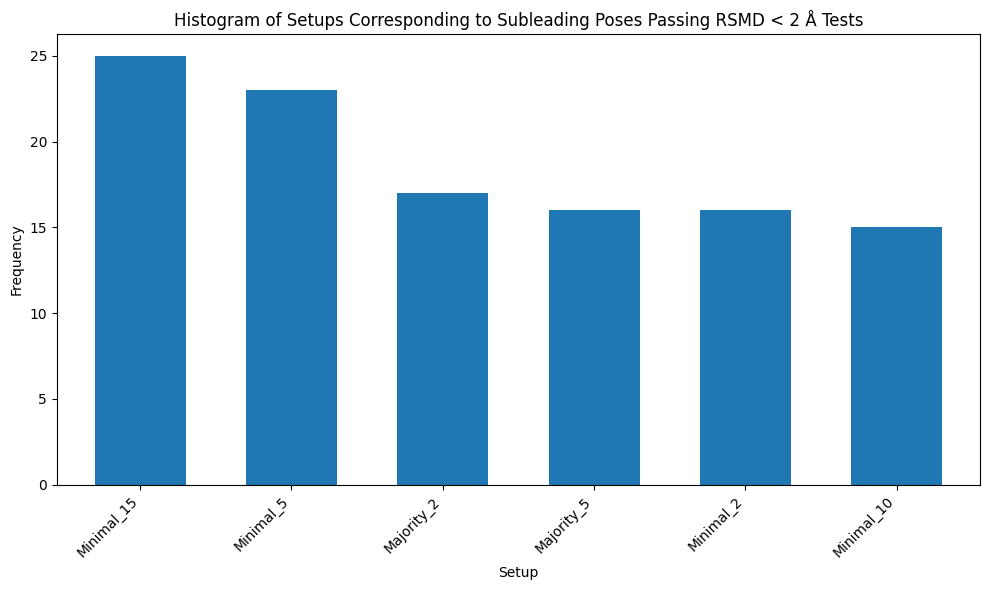


Setup frequencies:
Setup
Minimal_15    25
Minimal_5     23
Majority_2    17
Majority_5    16
Minimal_2     16
Minimal_10    15
Name: count, dtype: int64

Details of poses passing RMSD test:
    Subfolder                       Subsubfolder  \
0    5SD5_HWI   pocket_thr05_Majority0_results_5   
1    5SIS_JSM    pocket_thr05_Minimal0_results_2   
2    6WTN_RXT    pocket_thr05_Minimal0_results_2   
3    6XCT_478   pocket_thr05_Minimal2_results_15   
4    6XG5_TOP   pocket_thr05_Majority0_results_5   
..        ...                                ...   
107  8DKO_TFB   pocket_thr05_Minimal3_results_15   
108  8DP2_UMA   pocket_thr05_Minimal0_results_10   
109  8G0V_YHT  pocket_thr05_Minimal12_results_15   
110  8G6P_API   pocket_thr05_Minimal1_results_10   
111  8HO0_3ZI   pocket_thr05_Minimal2_results_15   

                                             Pose_Path   RMSD       Setup  
0    posebusters_benchmark_set_Ensemble_Run/5SD5_HW...  0.757  Majority_5  
1    posebusters_benchmark_set_E

In [ ]:
#@title **Ensembled RAPID-Net, count poses that pass RMSD < 2 Å that are not Top-1**

import pandas as pd
import matplotlib.pyplot as plt

input_file = 'Top_failed_but_others_do_succeed.txt'

try:
    data = pd.read_csv(input_file, sep="\t")
    print(f"File '{input_file}' successfully loaded.")
except FileNotFoundError:
    print(f"Error: File '{input_file}' not found.")
    exit()

print("\nData preview:")
print(data.head())

# Number of subfolders with RMSD < 2 Å
num_subfolders = data['Subfolder'].nunique()
print(f"\nNumber of subfolders where at least one pose has RMSD < 2 Å: {num_subfolders}")

setup_counts = data['Setup'].value_counts()

plt.figure(figsize=(10, 6))
setup_counts.plot(kind='bar', width=0.6)
plt.xlabel('Setup')
plt.ylabel('Frequency')
plt.title('Histogram of Setups Corresponding to Subleading Poses Passing RSMD < 2 \u212B Tests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nSetup frequencies:")
print(setup_counts)

print("\nDetails of poses passing RMSD test:")
print(data)


Processing completed for all selected subfolders.


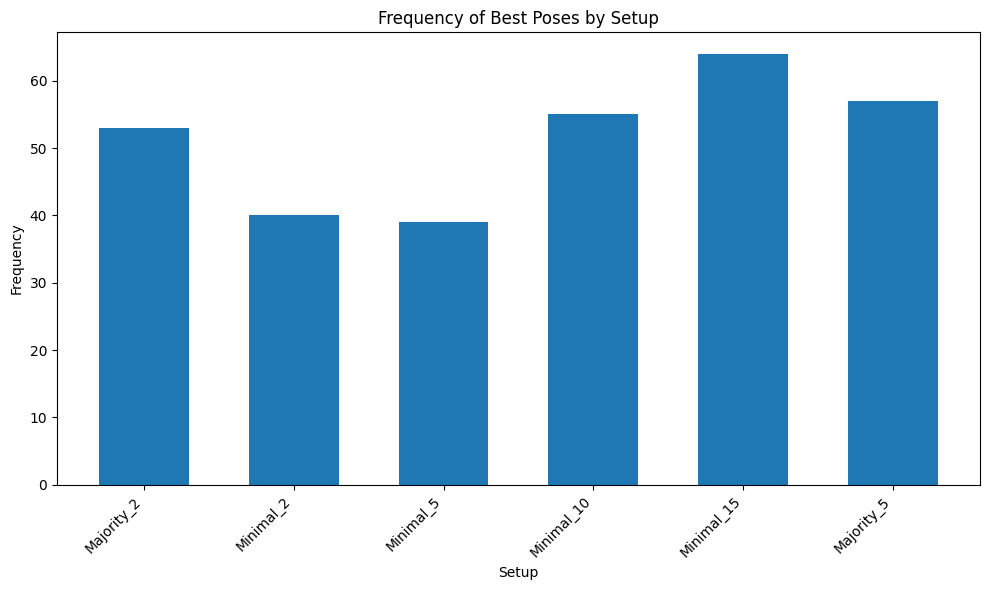

In [ ]:
import os
import pandas as pd
import shutil
from collections import defaultdict
import matplotlib.pyplot as plt

base_dir = 'posebusters_benchmark_set_Ensemble_Run'

subfolder_list_file = 'posebusters_pdb_ccd_ids.txt'

with open(subfolder_list_file, 'r') as f:
    subfolder_list = f.read().splitlines()

def list_files_in_directory(directory, extension):
    file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extension):
                file_paths.append(os.path.join(root, file))
    return file_paths

setup_frequency = defaultdict(int)

for subfolder_name in os.listdir(base_dir):
    if subfolder_name in subfolder_list:
        subfolder_path = os.path.join(base_dir, subfolder_name)
        if os.path.isdir(subfolder_path):
            docking_scores = {}

            csv_files = list_files_in_directory(subfolder_path, "_dockrpt.csv")

            for file_path in csv_files:
                try:
                    df = pd.read_csv(file_path)
                    if 'DOCK_SC' in df.columns:
                        scores = df['DOCK_SC'].astype(float).tolist()
                        for score in scores:
                            docking_scores[score] = file_path
                except Exception as e:
                    print(f"Error reading CSV file {file_path}: {e}")

            if docking_scores:
                most_favorable_score = min(docking_scores.keys())
                most_favorable_file = docking_scores[most_favorable_score]
                most_favorable_folder = os.path.dirname(most_favorable_file)

                setup_name = None
                subsubfolder_name = os.path.basename(most_favorable_folder)
                if "Majority" in subsubfolder_name and "results_" in subsubfolder_name:
                    threshold = subsubfolder_name.split("results_")[-1]
                    setup_name = f"Majority_{threshold}"
                elif "Minimal" in subsubfolder_name and "results_" in subsubfolder_name:
                    threshold = subsubfolder_name.split("results_")[-1]
                    setup_name = f"Minimal_{threshold}"

                if setup_name:
                    setup_frequency[setup_name] += 1

                # Search for the file ending in '_pose_1.sdf' within the most favorable folder
                leading_pose_file = None
                for root, dirs, files in os.walk(most_favorable_folder):
                    for file in files:
                        if file.endswith("_pose_1.sdf"):
                            leading_pose_file = os.path.join(root, file)
                            break
                    if leading_pose_file:
                        break

                if leading_pose_file:
                    protein_name = subfolder_name
                    new_file_name = f"{protein_name}_predicted_pose.sdf"
                    new_file_path = os.path.join(subfolder_path, new_file_name)
                    #shutil.copy(leading_pose_file, new_file_path)

print("Processing completed for all selected subfolders.")

plt.figure(figsize=(10, 6))
plt.bar(setup_frequency.keys(), setup_frequency.values(), width=0.6)
plt.xlabel('Setup')
plt.ylabel('Frequency')
plt.title('Frequency of Best Poses by Setup')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


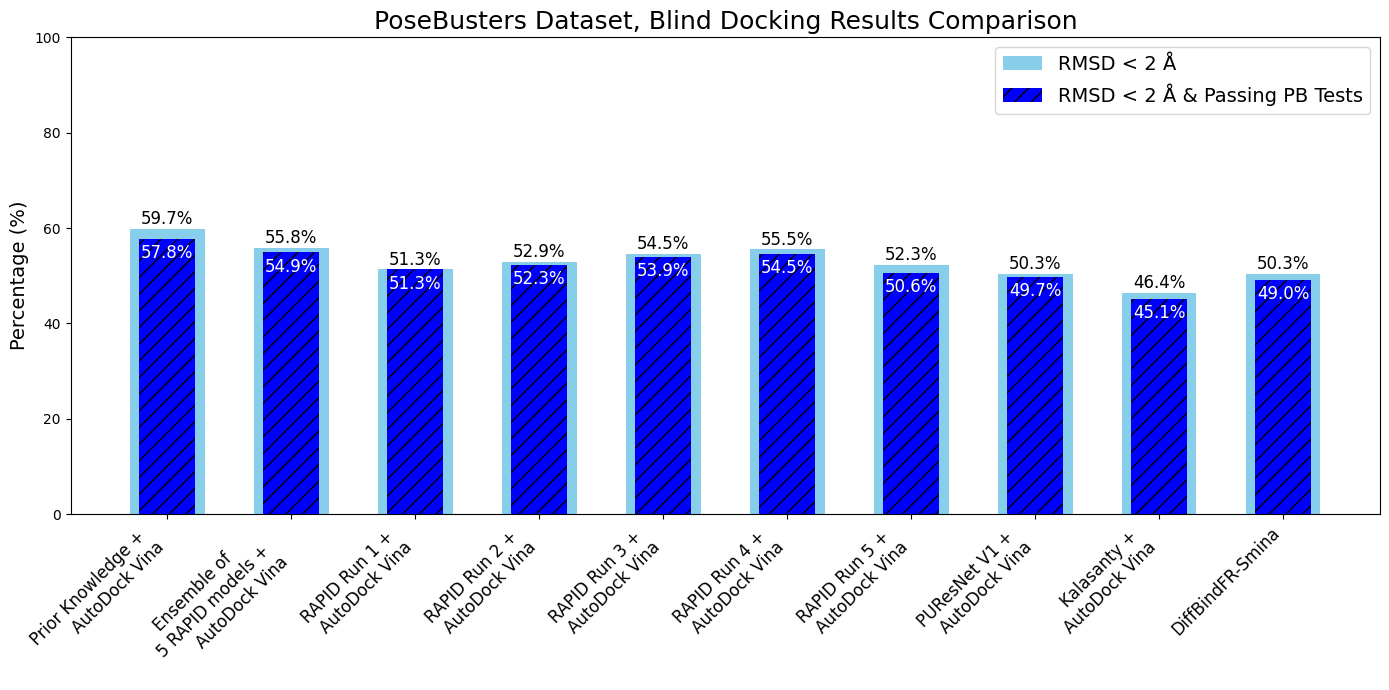

In [20]:
#@title **Plotting the results**

import matplotlib.pyplot as plt
import numpy as np

models = [
    "Prior Knowledge + \n AutoDock Vina",
    "Ensemble of       \n 5 RAPID models + \n AutoDock Vina",
    "RAPID Run 1 + \n AutoDock Vina",
    "RAPID Run 2 + \n AutoDock Vina",
    "RAPID Run 3 + \n AutoDock Vina",
    "RAPID Run 4 + \n AutoDock Vina",
    "RAPID Run 5 + \n AutoDock Vina",
    "PUResNet V1 + \n AutoDock Vina",
    "Kalasanty + \n AutoDock Vina",
    "DiffBindFR-Smina"
]

rmsd_less_than_2 = [184, 172, 158, 163, 168, 171, 161, 155, 143, 155]  # Counts for RMSD < 2 Å
passing_pb_tests = [178, 169, 158, 161, 166, 168, 156, 153, 139, 151]   # Counts for RMSD < 2 Å and passing PB tests

total = 308
rmsd_less_than_2_percent = [count / total * 100 for count in rmsd_less_than_2]
passing_pb_tests_percent = [count / total * 100 for count in passing_pb_tests]

x = np.arange(len(models))
bar_width = 0.6
bar_gap = 0.15

plt.figure(figsize=(14, 7))

bars1 = plt.bar(x, rmsd_less_than_2_percent, width=bar_width, label='RMSD < 2 Å', color='skyblue')
bars2 = plt.bar(x, passing_pb_tests_percent, width=bar_width - bar_gap, label='RMSD < 2 Å & Passing PB Tests',
                color='blue', hatch='//')

for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f'{rmsd_less_than_2_percent[i]:.1f}%', ha='center', fontsize=12, color='black')

for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 4,
             f'{passing_pb_tests_percent[i]:.1f}%', ha='center', fontsize=12, color='white')

plt.ylabel('Percentage (%)', fontsize=14)
plt.title('PoseBusters Dataset, Blind Docking Results Comparison', fontsize=18)
plt.xticks(x, models, rotation=45, ha='right', fontsize=12)
plt.ylim(0, 100)
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()


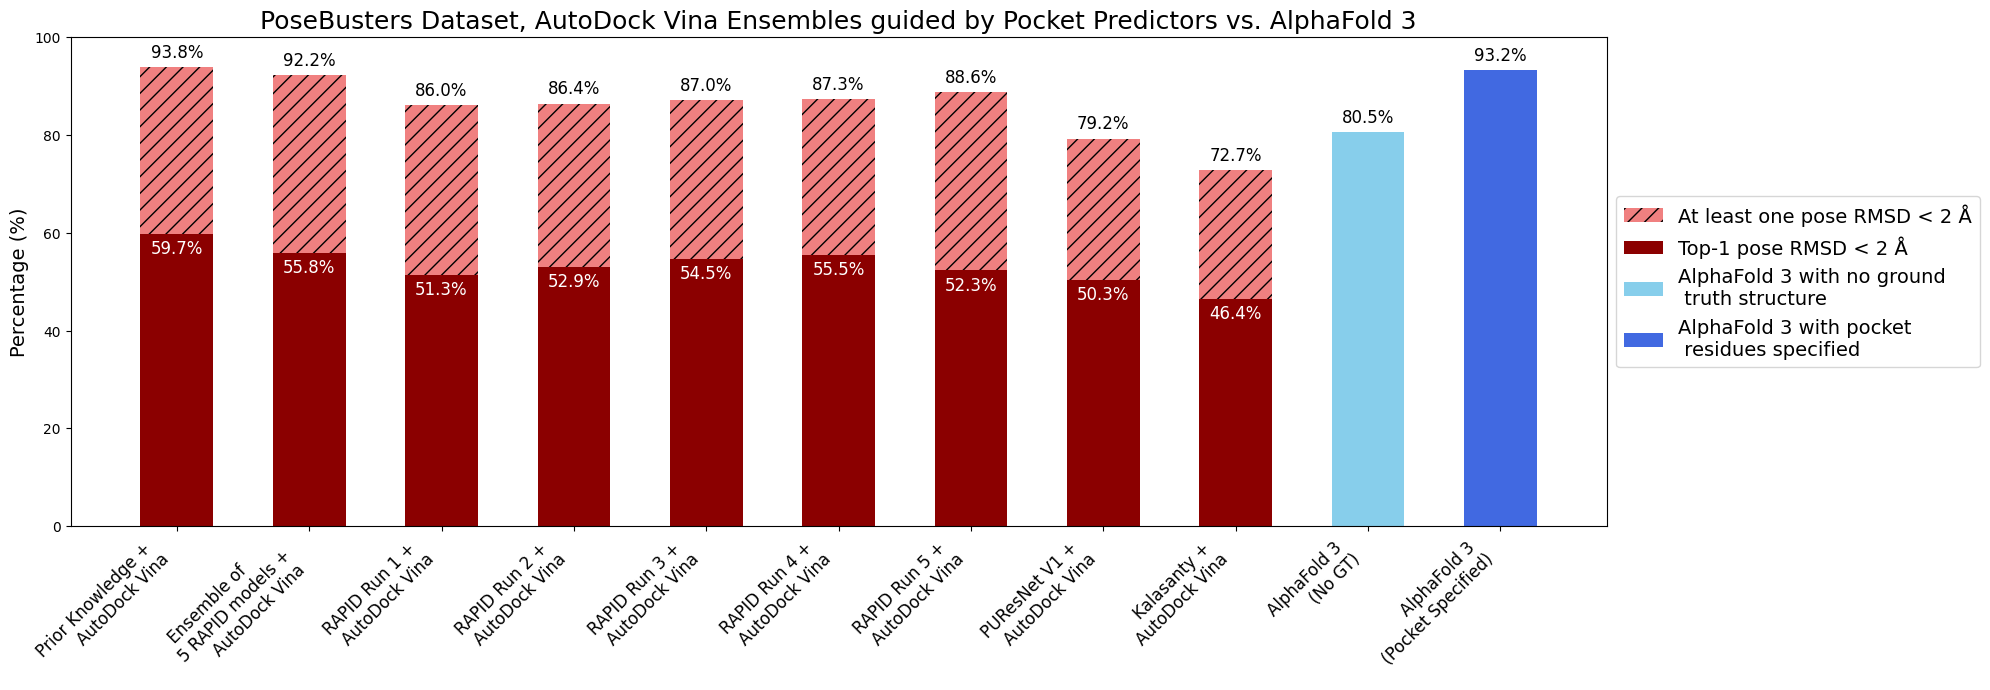

In [21]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    "Prior Knowledge +  \n AutoDock Vina ",
    " Ensemble of        \n5 RAPID models +\n AutoDock Vina",
    "RAPID Run 1 +  \n AutoDock Vina ",
    "RAPID Run 2 +  \n AutoDock Vina ",
    "RAPID Run 3 +  \n AutoDock Vina ",
    "RAPID Run 4 +  \n AutoDock Vina ",
    "RAPID Run 5 +  \n AutoDock Vina ",
    "PUResNet V1 +  \n AutoDock Vina ",
    "Kalasanty +  \n AutoDock Vina ",
    "AlphaFold 3  \n (No GT) ",
    "AlphaFold 3  \n (Pocket Specified) "
]

rmsd_less_than_2_at_least_one = [184 + 105, 172 + 112, 158 + 107, 163 + 103, 168 + 100, 171 + 98, 161 + 112, 155 + 89, 143 + 81, None, None]
rmsd_less_than_2_top1 = [184, 172, 158, 163, 168, 171, 161, 155, 143, None, None]


percentages_af3_no_gt = 80.5
percentages_af3_pocket = 93.2

total = 308

percentages_at_least_one = [count / total * 100 if count is not None else None for count in rmsd_less_than_2_at_least_one]
percentages_top1 = [count / total * 100 if count is not None else None for count in rmsd_less_than_2_top1]

percentages_at_least_one[-2] = percentages_af3_no_gt
percentages_at_least_one[-1] = percentages_af3_pocket
percentages_top1[-2] = None
percentages_top1[-1] = None

spacing_factor = 2

x = np.arange(len(models))
bar_width = 0.55


plt.figure(figsize=(20, 7))

bars1 = plt.bar(x[:-2], percentages_at_least_one[:-2], width=bar_width, label='At least one pose RMSD < 2 Å',
                color='lightcoral', hatch='//')

bars2 = plt.bar(x[:-2], percentages_top1[:-2], width=bar_width, label='Top-1 pose RMSD < 2 Å',
                color='darkred')

plt.bar(x[-2], percentages_at_least_one[-2], width=bar_width, label='AlphaFold 3 with no ground \n truth structure', color='skyblue')
plt.bar(x[-1], percentages_at_least_one[-1], width=bar_width, label='AlphaFold 3 with pocket \n residues specified', color='royalblue')

for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width() / 2, min(bar.get_height() + 2, 100),
             f'{percentages_at_least_one[i]:.1f}%', ha='center', fontsize=12, color='black')

for i, bar in enumerate(bars2):
    if percentages_top1[i] is not None:
        plt.text(bar.get_x() + bar.get_width() / 2, min(percentages_top1[i] - 4, 100),
                 f'{percentages_top1[i]:.1f}%', ha='center', fontsize=12, color='white')

plt.text(x[-2], min(percentages_at_least_one[-2] + 2, 100), f'{percentages_at_least_one[-2]:.1f}%', ha='center', fontsize=12, color='black')
plt.text(x[-1], min(percentages_at_least_one[-1] + 2, 100), f'{percentages_at_least_one[-1]:.1f}%', ha='center', fontsize=12, color='black')

plt.ylim(0, 100)

plt.xticks(x, models, rotation=45, ha='right', fontsize=12, y=0.01)

plt.ylabel('Percentage (%)', fontsize=14)
plt.title('PoseBusters Dataset, AutoDock Vina Ensembles guided by Pocket Predictors vs. AlphaFold 3', fontsize=18)

plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
